Assignment 7 - Convolutional Neural Network.

Class Time: N4-N6 Thursday

Team members:


*   Aguilar López Sebastián Eucebio #1975946
*   Garcia Lira Esdras #1995008
*   Martínez Gámez América de los Ángeles #1933618
*   Oliva Villarreal Angel #2004926

*To train a convolutional neural network model.*



1. Load libraries.

In [ ]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

2. Load data.

In [ ]:
# Load the data
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


3. Data preprocessing.


In [ ]:
# Normalize the data to a range of 0 to 1 and reshape for CNN input
train_data = train_data.astype('float32') / 255.0
test_data = test_data.astype('float32') / 255.0

# Reshape the data to fit the model (adding channel dimension)
train_data = train_data.reshape((train_data.shape[0], 28, 28, 1))
test_data = test_data.reshape((test_data.shape[0], 28, 28, 1))

# Convert labels to categorical format
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

4. Model selection and training.


In [ ]:
# Create the Convolutional Neural Network model
model = Sequential()

# Add convolutional layer with 32 filters and a kernel size of (3,3)
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add a dense hidden layer with 128 neurons and ReLU activation function
model.add(Dense(128, activation='relu'))

# Output layer with softmax activation function for multi-class classification
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model with more epochs than the previous assignment for better performance
model.fit(train_data, train_labels, epochs=10, batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 25ms/step - accuracy: 0.9067 - loss: 0.3170
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9843 - loss: 0.0536
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 26ms/step - accuracy: 0.9910 - loss: 0.0302
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 25ms/step - accuracy: 0.9940 - loss: 0.0192
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.9963 - loss: 0.0128
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.9974 - loss: 0.0091
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9980 - loss: 0.0075
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 23ms/step - accuracy: 0.9988 - loss: 0.0041
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9986 - loss: 0.0049
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 25ms/step - accuracy: 0.9988 - loss: 0.0038


5. Model testing.

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9817 - loss: 0.0800
Model Accuracy: 0.99
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
Prediction: 7, Actual value: 7


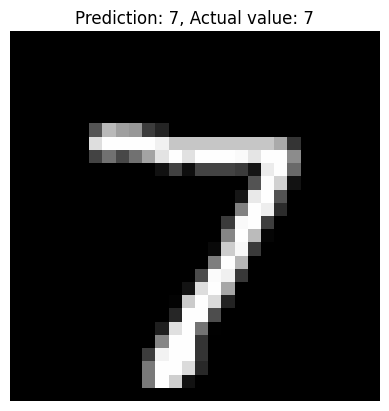

Prediction: 2, Actual value: 2


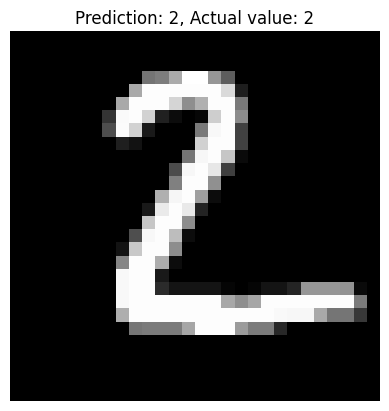

Prediction: 1, Actual value: 1


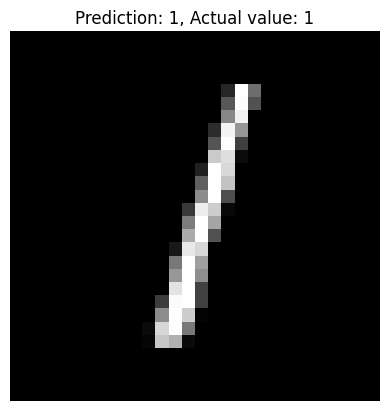

Prediction: 0, Actual value: 0


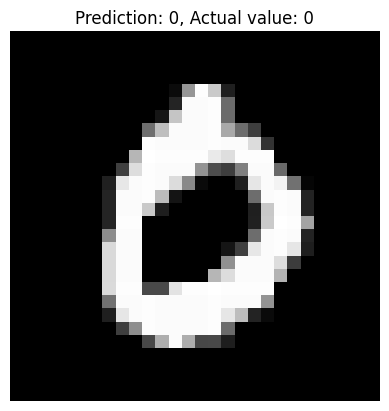

Prediction: 4, Actual value: 4


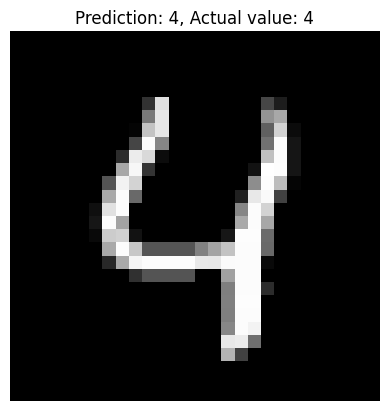

In [ ]:
# Evaluate the model's accuracy on the test set
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f'Model Accuracy: {test_accuracy:.2f}')

# Make 5 predictions with the test dataset
predictions = model.predict(test_data[:5])  # Predict the first 5 images

# Display predictions and actual values
for i in range(5):
    predicted_label = np.argmax(predictions[i])
    actual_label = np.argmax(test_labels[i])
    print(f'Prediction: {predicted_label}, Actual value: {actual_label}')

    # Visualize the image
    plt.imshow(test_data[i].reshape(28, 28), cmap='gray')
    plt.title(f'Prediction: {predicted_label}, Actual value: {actual_label}')
    plt.axis('off')
    plt.show()

Answers to Questions:

1.   **How many epochs did you use to improve the performance of the model compared with the feedforward neural network of assignment 6?**

  In this exercise, I used 10 epochs to train the Convolutional Neural Network (CNN) model. This is an increase compared to the previous assignment where I used only 5 epochs for training the feedforward neural network.

2.   **Did you get a better performance on this assignment or on assignment 6? Why?**

  Yes, I achieved better performance in this assignment using the CNN compared to the feedforward neural network from assignment 6. The reasons for this improvement include:
  *   **Architecture**: CNNs are specifically designed for image data and can capture spatial hierarchies through convolutional layers. This allows them to learn more complex features compared to simple feedforward networks.

  *   **Pooling Layers**: The inclusion of max pooling layers reduces dimensionality while preserving important features, which helps in improving generalization.

  *  **Increased Epochs**: Training for more epochs allows the model to learn better

Overall, these factors contribute significantly to improved accuracy when working with image datasets like MNIST.

# References:
*   Matthes, E. (2023). Python crash course. No starch press.
*   https://www.w3schools.com/python/default.asp
*   Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.
*   https://www.tensorflow.org/tutorials/keras/classification
